In [1]:
import numpy as np
from scipy import stats

# データ
x = np.array([10, 8, 12, 8, 11, 16, 17, 20, 15, 13])
y = np.array([30, 22, 34, 21, 27, 40, 42, 50, 41, 33])
n = len(x)

# 1. 平均値
x_mean = np.mean(x)
y_mean = np.mean(y)

# 2. 平方和・偏差積和
Sxx = np.sum((x - x_mean)**2)
Sxy = np.sum((x - x_mean) * (y - y_mean))
Syy = np.sum((y - y_mean)**2)

# 3. 回帰係数 a, b
a = Sxy / Sxx
b = y_mean - a * x_mean

# 回帰値・残差
y_hat = a * x + b
residuals = y - y_hat

# 4. 平方和の分解
SSR = np.sum((y_hat - y_mean)**2)   # 回帰による平方和
SSE = np.sum((residuals)**2)       # 残差平方和

# 5. 寄与率 R^2
R2 = SSR / Syy

# 6. 自由度
df_total = n - 1
df_reg = 1
df_res = n - 2

# 7. F検定
MSR = SSR / df_reg
MSE = SSE / df_res
F_value = MSR / MSE

# F臨界値（有意水準5%）
F_crit = stats.f.ppf(0.95, df_reg, df_res)

# 8. 回帰係数 a の t検定
SE_a = np.sqrt(MSE / Sxx)
t_value = a / SE_a
t_crit = stats.t.ppf(0.975, df_res)   # 両側5%

# 結果表示
print("1. 平均値")
print(" x̄ =", x_mean)
print(" ȳ =", y_mean)

print("\n2. 平方和など")
print(" Sxx =", Sxx)
print(" Sxy =", Sxy)

print("\n3. 回帰式")
print(f" y = {a:.4f}x + {b:.4f}")

print("\n4. 平方和の分解")
print(" SSR（回帰） =", SSR)
print(" SSE（残差） =", SSE)
print(" Syy（全体） =", Syy)

print("\n5. 寄与率 R² =", R2)

print("\n6. 自由度")
print(" 全体 df =", df_total)
print(" 回帰 df =", df_reg)
print(" 残差 df =", df_res)

print("\n7. F検定")
print(" F値 =", F_value)
print(" F臨界値 (5%) =", F_crit)
print(" → 回帰式は有意？：", "有意" if F_value > F_crit else "有意でない")

print("\n8. 回帰係数 a の t検定")
print(" t値 =", t_value)
print(" t臨界値 (5%) =", t_crit)
print(" → 回帰係数 a は有意？：", "有意" if abs(t_value) > t_crit else "有意でない")



1. 平均値
 x̄ = 13.0
 ȳ = 34.0

2. 平方和など
 Sxx = 142.0
 Sxy = 327.0

3. 回帰式
 y = 2.3028x + 4.0634

4. 平方和の分解
 SSR（回帰） = 753.0211267605631
 SSE（残差） = 30.978873239436602
 Syy（全体） = 784.0

5. 寄与率 R² = 0.9604861310721469

6. 自由度
 全体 df = 9
 回帰 df = 1
 残差 df = 8

7. F検定
 F値 = 194.46055921800414
 F臨界値 (5%) = 5.317655071578714
 → 回帰式は有意？： 有意

8. 回帰係数 a の t検定
 t値 = 13.944911588748212
 t臨界値 (5%) = 2.306004135204166
 → 回帰係数 a は有意？： 有意


### ■ 問2　データの種類

#### ダミー変数を用いた回帰

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [13]:
data = load_diabetes()#scikit-learn に標準で入っている「糖尿病 progression（進行度）予測データセット」 を読み込むコード

In [16]:
df_X = pd.DataFrame(data.data, columns = data.feature_names)
df_y = pd.DataFrame(data.target, columns =["y"])
df = pd.concat([df_X, df_y], axis=1)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [18]:
df2 = df[["bmi", "sex", "y"]]
df2

,bmi,sex,y
0,0.061696,0.050680,151.0
1,-0.051474,-0.044642,75.0
2,0.044451,0.050680,141.0
3,-0.011595,-0.044642,206.0
4,-0.036385,-0.044642,135.0
...,...,...,...
437,0.019662,0.050680,178.0
438,-0.015906,0.050680,104.0
439,-0.015906,0.050680,132.0
440,0.039062,-0.044642,220.0


In [19]:
#ダミー変数化済みになっていることを確認
df2["sex"].unique()

array([ 0.05068012, -0.04464164])

In [20]:
X = df2[["bmi","sex"]]
y = df2["y"]

In [21]:
model = LinearRegression()
model.fit(X,y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


ZeroDivisionError: float division by zero

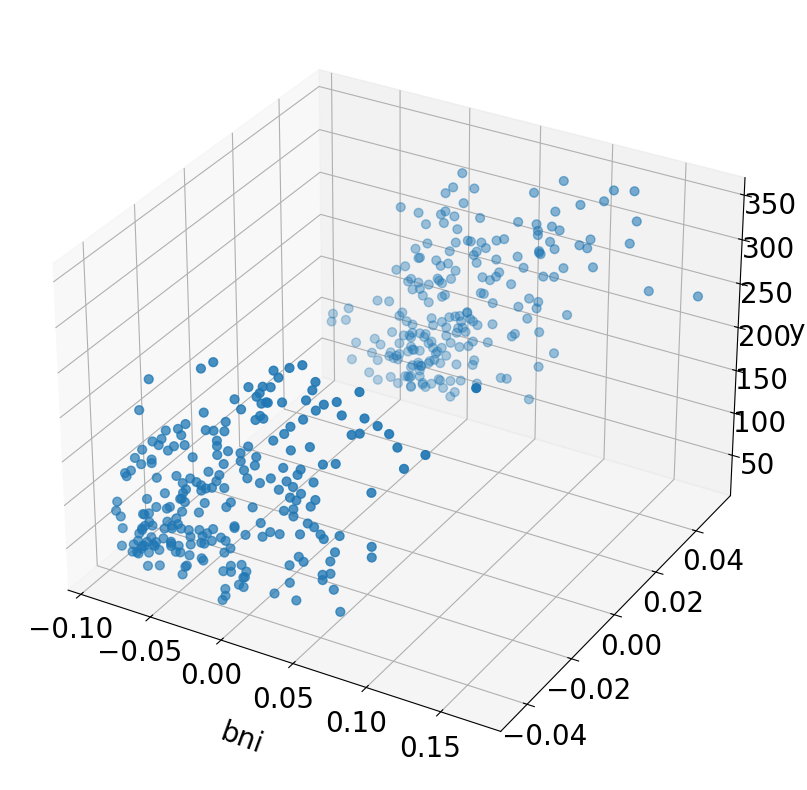

In [23]:
cmap = plt.get_cmap("tab10")
plt.rcParams["font.size"] = 20
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_xlabel("bni", labelpad=20, rotation=-20)
ax1.set_zlabel("y", labelpad=5, rotation=0)
ax1.scatter(df2["bmi"], df2["sex"], df2["y"], s=40)
X_array, Y_array = np.meshgrid(np.arange(min(df2["bmi"]), max(df2["bmi"]), 0))

### ■ 問2　データの種類

In [26]:
import pandas as pd

# データフレーム作成
data = {
    "年齢": [15, 15, 14, 12, 15, 13],
    "性別": ["男", "女", "男", "男", "女", "男"],
    "身長": [171.3, 154.2, 160.8, 153.7, 159.3, 162.9],
    "体重": [58.3, 45.1, 60.7, 52.4, 56.8, 63.1],
    "学年": [3, 3, 2, 1, 3, 1],
    "クラス": ["A", "B", "A", "B", "B", "A"]
}

df = pd.DataFrame(data)

# 量的変数：数値型（int, float）
quantitative = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

# 質的変数：文字列 or カテゴリ（object型）
qualitative = [col for col in df.columns if df[col].dtype == "object"]

print("量的変数：", quantitative)
print("質的変数：", qualitative)


量的変数： ['年齢', '身長', '体重', '学年']
質的変数： ['性別', 'クラス']


### ■ 問3　統計ソフトウェアの活用

In [27]:
import statsmodels.api as sm
import pandas as pd

# --- mtcars データ読み込み ---
mtcars = sm.datasets.get_rdataset("mtcars").data

# --- 説明変数と目的変数 ---
X = mtcars[["hp", "wt", "gear"]]
y = mtcars["mpg"]

# 定数項追加
X = sm.add_constant(X)

# --- 重回帰分析 ---
model = sm.OLS(y, X).fit()

# --- 1. データ数（n） ---
n = len(mtcars)

# --- 2. 回帰式全体の有意性（F値のp値 < 0.05？） ---
f_pvalue = model.f_pvalue
is_model_significant = f_pvalue < 0.05

# --- 3. 各説明変数の有意性（p値 < 0.05） ---
coef_pvalues = model.pvalues

hp_sig = coef_pvalues["hp"] < 0.05
wt_sig = coef_pvalues["wt"] < 0.05
gear_sig = coef_pvalues["gear"] < 0.05

# --- 4. 決定係数 ---
r2 = model.rsquared

# --- 5. 自由度調整済み決定係数 ---
adj_r2 = model.rsquared_adj

# --- 結果表示 ---
print(f"1. データ数: {n}")
print(f"2. 回帰式は有意か？ → {is_model_significant} (p値 = {f_pvalue})")
print("3. 各説明変数の有意性 (p < 0.05)")
print(f"   hp   : {hp_sig} (p値 = {coef_pvalues['hp']})")
print(f"   wt   : {wt_sig} (p値 = {coef_pvalues['wt']})")
print(f"   gear : {gear_sig} (p値 = {coef_pvalues['gear']})")
print(f"4. 決定係数 R^2: {r2}")
print(f"5. 自由度調整済み決定係数 Adj R^2: {adj_r2}")


1. データ数: 32
2. 回帰式は有意か？ → True (p値 = 4.3338449645917454e-11)
3. 各説明変数の有意性 (p < 0.05)
   hp   : True (p値 = 0.000887942168033695)
   wt   : True (p値 = 0.0007605933136017365)
   gear : False (p値 = 0.2409627017004652)
4. 決定係数 R^2: 0.8352309600685555
5. 自由度調整済み決定係数 Adj R^2: 0.8175771343616149
